# Day 1

## Day 1- Part 1

In [1]:
# load data

with open('../challenges/1/input.txt', 'r') as f:
    lines = ['break' if line == '\n' else line.strip('\n') for line in f.readlines()]

each_elf = " ".join(lines).split(' break ')
# each_elf

In [2]:
each_elf_list = []
for elf in each_elf:
    each_elf_list.append(elf.split(' '))

len(each_elf_list)

241

In [3]:
each_elf_total = [sum([int(cals) for cals in elf.split()]) for elf in each_elf]

In [4]:
max_elf = 0
max_cals = 0

for i, elf in enumerate(each_elf_list, 1):
    cals_carried = sum([int(cal) for cal in elf])
    if cals_carried > max_cals:
        max_elf = i
        max_cals = cals_carried

In [5]:
max_cals

67658

## Day 1 - Part 2

In [6]:
elf_total_cals = []

for elf in each_elf_list:
    elf_total_cals.append(sum([int(cal) for cal in elf]))

elf_total_cals

top_three = sorted([(x, i) for i, x in enumerate(elf_total_cals, 1)], reverse=True)[:3]

In [7]:
total_top_three = sum([elf[0] for elf in top_three])
total_top_three

200158

# Day 4

## Day 4 - Part 1

In [8]:
def get_data():
    with open('../challenges/4/input.txt', 'r') as f:
        lines = [line.strip('\n').split(',') for line in f]
    return lines

In [9]:
lines = get_data()

In [10]:
counter = 0

for pair in lines:
    sequential_zones = []
    for elf in pair:
        sec_start_stop = [int(zone) for zone in elf.split('-')]
        sequential_zones.append(set(range(sec_start_stop[0], sec_start_stop[1] + 1)))
    
    # Option 1
    # if sequential_zones[0].issubset(sequential_zones[1]) or sequential_zones[0].issuperset(sequential_zones[1]):
    #     counter += 1
    
    # Option 2
    overlap = sequential_zones[0].intersection(sequential_zones[1])
    if overlap == sequential_zones[0] or overlap == sequential_zones[1]:
        counter += 1
        
counter

444

## Day 4 - Part 2

In [11]:
counter = 0

for pair in lines:
    sequential_zones = []
    for elf in pair:
        sec_start_stop = [int(zone) for zone in elf.split('-')]
        sequential_zones.append(set(range(sec_start_stop[0], sec_start_stop[1] + 1)))
    
    overlap = sequential_zones[0].intersection(sequential_zones[1])
    if len(overlap) > 0:
        counter += 1
        
counter

801

# Day 5

## Day 5 - Part 1

In [12]:
def create_crates():
    crate_stacks = [
        ['H', 'T', 'Z', 'D'],
        ['Q', 'R', 'W', 'T', 'G', 'C', 'S'],
        ['P', 'B', 'F', 'Q', 'N', 'R', 'C', 'H'],
        ['L', 'C', 'N', 'F', 'H', 'Z'],
        ['G', 'L', 'F', 'Q', 'S'],
        ['V', 'P', 'W', 'Z', 'B', 'R', 'C', 'S'],
        ['Z', 'F', 'J'],
        ['D', 'L', 'V', 'Z', 'R', 'H', 'Q'],
        ['B', 'H', 'G', 'N', 'F', 'Z', 'L', 'D']
    ]
    return crate_stacks

In [13]:
crate_stacks = create_crates()

In [14]:
with open('../challenges/5/input.txt', 'r') as f:
    raw_directions = [line.strip('\n') for line in f]

directions = []
for direction in raw_directions:
    directions.append([int(element) for element in direction.split() if element.isnumeric()])

In [15]:
for direction in directions:
    for i in range(direction[0]):
        source = crate_stacks[direction[1] - 1]
        destination = crate_stacks[direction[2] - 1]

        destination.append(source.pop())

In [16]:
top_crates = ''.join([crate_stack[-1] for crate_stack in crate_stacks])
top_crates

'RFFFWBPNS'

## Day 5 - Part 2

In [17]:
crate_stacks = create_crates()

In [18]:
for direction in directions:
    source = crate_stacks[direction[1] - 1]
    destination = crate_stacks[direction[2] - 1]
    num_crates = direction[0]
    for i in range(-num_crates, 0):
        destination.append(source.pop(i))

In [19]:
top_crates = ''.join([crate_stack[-1] for crate_stack in crate_stacks])
top_crates

'CQQBBJFCS'

# Day 6

## Day 6 - Part 1

In [20]:
with open('../challenges/6/input.txt', 'r') as f:
    input_string = f.readlines()[0]

In [21]:
# Part 1
for i, _ in enumerate(input_string, 1):
    if len(set(input_string[i - 4: i])) == 4:
        output = i
        print(i)
        break

1987


## Day 6 - Part 2

In [22]:
# Part 2
for i, _ in enumerate(input_string, 1):
    if len(set(input_string[i - 14: i])) == 14:
        output = i
        print(i)
        break

3059


# Day 7

## Day 7 - Part 1

In [23]:
import pprint
pp = pprint.PrettyPrinter()

In [24]:
with open('../challenges/7/input.txt', 'r') as f:
    terminal_input = [line.strip('\n') for line in f.readlines()]

In [25]:
dirs = {}

for line in terminal_input:
    match line.split():
        case '$', 'cd', '/': cur_path = ['/']
        case '$', 'cd', '..': cur_path.pop()
        case '$', 'cd', x : cur_path.append(x+'/')
        case 'dir', _ : pass
        case '$', 'ls' : pass
        case size, _ : 
            for i, _ in enumerate(cur_path, 1):
                # print("".join(cur_path[:i]))
                try:
                    dirs["".join(cur_path[:i])] += int(size)
                except:
                    dirs["".join(cur_path[:i])] = int(size)
# pp.pprint(dirs)

In [26]:
sum(value for value in dirs.values() if value <= 100_000)

1454188

In [27]:
# of course there is an itertools for accumulating
from itertools import accumulate

dirs = {}

for line in terminal_input:
    match line.split():
        case '$', 'cd', '/': cur_path = ['/']
        case '$', 'cd', '..': cur_path.pop()
        case '$', 'cd', x : cur_path.append(x+'/')
        case 'dir', _ : pass
        case '$', 'ls' : pass
        case size, _ : 
            for path in accumulate(cur_path):
                try:
                    dirs[path] += int(size)
                except KeyError:
                    dirs[path] = int(size)
# pp.pprint(dirs)

In [28]:
sum(value for value in dirs.values() if value <= 100_000)

1454188

## Day 7 - Part 2

In [29]:
max_other = 70_000_000 - 30_000_000
min(dir_size for dir_size in dirs.values() if dir_size >= dirs['/'] - max_other)

4183246

# Day 8

## Day 8 - Part 1

In [30]:
import numpy as np

In [31]:
with open('../challenges/8/input.txt', 'r') as f:
    tree_grid = [[int(n) for n in line.strip('\n')] for line in f.readlines()]
# pp.pprint(tree_grid)

In [32]:
tree_grid = np.array(tree_grid)
visible = 0
for i in range(1, tree_grid.shape[0] - 1):
    for j in range(1, tree_grid.shape[1] - 1):
        
        right = tree_grid[i, j] > np.max(tree_grid[i, :j])
        left = tree_grid[i, j] > np.max(tree_grid[i, j + 1:])
        top = tree_grid[i, j] > np.max(tree_grid[:i, j])
        bottom = tree_grid[i, j] > np.max(tree_grid[i + 1:, j])
        visible += right or left or top or bottom
        
visible += 2 * sum(tree_grid.shape) - 4
print(visible)

1705


## Day 8 - Part 2

In [33]:
def calc_score(cur_tree, line_of_trees):
    # I am unhappy this function looks this way
    score = 0
    for tree_height in line_of_trees:
        if cur_tree > tree_height:
            score += 1
        else:
            score += 1
            return score
    return score

In [34]:
scores = np.zeros(tree_grid.shape)

In [35]:
for i in range(tree_grid.shape[0]):
    for j in range(tree_grid.shape[1]):
        cur_tree_height = tree_grid[i, j]
        score = 1
        # from current tree
        # looking right
        score *= calc_score(cur_tree_height, tree_grid[i, j+1:])
        # looking left
        score *= calc_score(cur_tree_height, tree_grid[i, :j][::-1])
        # looking up
        score *= calc_score(cur_tree_height, tree_grid[:i, j][::-1])
        # looking down
        score *= calc_score(cur_tree_height, tree_grid[i+1:, j])
        
        scores[i, j] = score
        
int(np.max(scores))

371200

# Day 9

## Day 9 - Part 1

In [36]:
from time import perf_counter as pfc
from pygame import Vector2 as V    


def read_puzzle(file):
    with open(file) as f:
        return [line.strip().split() for line in f.readlines()]    


def move(rope):
    for i in range(len(rope)-1):
        s1, s2 = rope[i], rope[i+1]
        if s1.distance_to(s2) >= 2:
            dx, dy = s1 - s2
            if abs(dx) > 1:  dx //= abs(dx)
            if abs(dy) > 1:  dy //= abs(dy)
            rope[i+1] = s2 + V(dx, dy)
    return rope    


def solve(puzzle, rope_length):
    DIR = dict(R=V(1, 0), L=V(-1, 0), U=V(0, -1), D=V(0, 1))
    rope, tail_trail = [V(0, 0)]*rope_length, set()
    for dir, steps in puzzle:
        for _ in range(int(steps)):
            rope[0] = rope[0] + DIR[dir]
            rope = move(rope)
            tail_trail.add(tuple(rope[-1]))
    return len(tail_trail)    


puzzle = read_puzzle('../challenges/9/input.txt')
print(solve(puzzle, 2))
print(solve(puzzle, 10))

pygame 2.1.2 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
6197
2562


# Day 10

## Day 10 - Part 1

In [37]:
with open('../challenges/10/input.txt', 'r') as f:
    lines = [line.strip('\n') for line in f]

In [38]:
lines[:10]

['noop',
 'noop',
 'addx 6',
 'addx -1',
 'noop',
 'addx 5',
 'addx 3',
 'noop',
 'addx 3',
 'addx -1']

In [39]:
cycle = 0
saved_signals = []
X = 1

for line in lines:
    if line == 'noop':
        cycle += 1
        if (cycle - 20) % 40 == 0:
            saved_signals.append(X * cycle)
    else:
        for i in range(2):
            cycle += 1
            if (cycle - 20) % 40 == 0:
                saved_signals.append(X * cycle)
        X += int(line.split()[1])

print(sum(saved_signals))

14360


## Day 10 - Part 2

In [40]:
X = 1
crt_pos = 0
crt_out = ''

for line in lines:
    if line == 'noop':
        crt_out += '#' if crt_pos in [X-1, X, X+1] else ' '
        
        if crt_pos == 39:
            print(crt_out)
            crt_out = ''
            crt_pos = 0
        else:
            crt_pos += 1
        
    else:
        for i in range(2):
            crt_out += '#' if crt_pos in [X-1, X, X+1] else ' '
        
            if crt_pos == 39:
                print(crt_out)
                crt_out = ''
                crt_pos = 0
            else:
                crt_pos += 1
        X += int(line.split()[1])

###   ##  #  #  ##  #### ###  #### #### 
#  # #  # # #  #  # #    #  # #       # 
###  #    ##   #  # ###  #  # ###    #  
#  # # ## # #  #### #    ###  #     #   
#  # #  # # #  #  # #    # #  #    #    
###   ### #  # #  # #### #  # #### #### 


# Day 11

## Day 11 - Part 1

In [41]:
with open('../challenges/11/input.txt', 'r') as f:
    lines = [line.strip('\n') for line in f]

monkeys_raw = []
for i in range(0, len(lines), 7):
    monkeys_raw.append([line.strip() for line in lines[i: i + 6]])

In [42]:
monkeys_raw

[['Monkey 0:',
  'Starting items: 50, 70, 89, 75, 66, 66',
  'Operation: new = old * 5',
  'Test: divisible by 2',
  'If true: throw to monkey 2',
  'If false: throw to monkey 1'],
 ['Monkey 1:',
  'Starting items: 85',
  'Operation: new = old * old',
  'Test: divisible by 7',
  'If true: throw to monkey 3',
  'If false: throw to monkey 6'],
 ['Monkey 2:',
  'Starting items: 66, 51, 71, 76, 58, 55, 58, 60',
  'Operation: new = old + 1',
  'Test: divisible by 13',
  'If true: throw to monkey 1',
  'If false: throw to monkey 3'],
 ['Monkey 3:',
  'Starting items: 79, 52, 55, 51',
  'Operation: new = old + 6',
  'Test: divisible by 3',
  'If true: throw to monkey 6',
  'If false: throw to monkey 4'],
 ['Monkey 4:',
  'Starting items: 69, 92',
  'Operation: new = old * 17',
  'Test: divisible by 19',
  'If true: throw to monkey 7',
  'If false: throw to monkey 5'],
 ['Monkey 5:',
  'Starting items: 71, 76, 73, 98, 67, 79, 99',
  'Operation: new = old + 8',
  'Test: divisible by 5',
  'If t

In [43]:
TEST_PRODUCT = 2 * 7 * 13 * 3 * 19 * 5 * 11 * 17

class Monkey():
    
    def __init__(self, number, items, operation, test, if_true, if_false):
        self.number = number
        self.items = items
        self.operation = operation
        self.test = test
        self.if_true = if_true
        self.if_false = if_false
        self.inspects = 0
        
    def inspect_item(self, item, relief):
        self.inspects += 1
        worry = eval(self.operation.replace('old', item))
        if relief == 1:
            worry = worry % TEST_PRODUCT
        else:
            worry = worry // relief
        self.items.remove(item)
        if worry % self.test == 0:
            return self.if_true, str(worry)
        else:
            return self.if_false, str(worry)

In [44]:
monkeys = []
for monkey in monkeys_raw:
    monkey_num = int(monkey[0].split()[-1].strip(':'))
    monkey_items = [item.strip(',') for item in monkey[1].split()[2:]]
    monkey_operation = monkey[2].split(' = ')[1]
    monkey_test = int(monkey[3].split()[-1])
    monkey_if_true = int(monkey[4].split()[-1])
    monkey_if_false = int(monkey[5].split()[-1])
    monkeys.append(Monkey(
        monkey_num,
        monkey_items,
        monkey_operation,
        monkey_test,
        monkey_if_true,
        monkey_if_false
    ))
    
for i in range(20):
    # print(i)
    for monkey in monkeys:
        # print(monkey.number)
        while monkey.items:
            for item in monkey.items:
                throw_to, worry = monkey.inspect_item(item, 3)
                monkeys[throw_to].items.append(worry)
                
top_two = sorted([monkey.inspects for monkey in monkeys], reverse=True)[:2]   
monkey_biz = top_two[0] * top_two[1]
monkey_biz

151312

## Day 11 - Part 2

In [45]:
monkeys = []
for monkey in monkeys_raw:
    monkey_num = int(monkey[0].split()[-1].strip(':'))
    monkey_items = [item.strip(',') for item in monkey[1].split()[2:]]
    monkey_operation = monkey[2].split(' = ')[1]
    monkey_test = int(monkey[3].split()[-1])
    monkey_if_true = int(monkey[4].split()[-1])
    monkey_if_false = int(monkey[5].split()[-1])
    monkeys.append(Monkey(
        monkey_num,
        monkey_items,
        monkey_operation,
        monkey_test,
        monkey_if_true,
        monkey_if_false
    ))
    
for i in range(10_000):
    # print(i)
    for monkey in monkeys:
        # print(monkey.number)
        while monkey.items:
            for item in monkey.items:
                throw_to, worry = monkey.inspect_item(item, 1)
                monkeys[throw_to].items.append(worry)
                
top_two = sorted([monkey.inspects for monkey in monkeys], reverse=True)[:2]
monkey_biz = top_two[0] * top_two[1]
monkey_biz

51382025916

# Day 12

# Day 12- Part 1

In [46]:
import networkx as nx
import numpy as np

In [47]:
with open('../challenges/12/input.txt', 'r') as f:
    matrix = np.array([[ord(c) for c in l.strip()] for l in f.readlines()])
# matrix

In [48]:
matrix = np.array(matrix)

# Start and end coordinates
start = tuple(*np.argwhere(matrix==ord('S'))) 
end = tuple(*np.argwhere(matrix==ord('E')))

# Replace with value 
matrix[start] = ord('a')
matrix[end] = ord('z')

In [49]:
G = nx.grid_2d_graph(*np.array(matrix).shape, create_using=nx.DiGraph)
G.remove_edges_from([(a, b) for a, b in G.edges if matrix[b] > matrix[a] + 1])
p = nx.shortest_path_length(G, target=end)

In [50]:
p[start]

391

## Day 12 - Part 2

In [51]:
min(p[a] for a in p if matrix[a] == ord('a'))

386

# Day 13

In [52]:
with open('../challenges/13/input.txt', 'r') as f:
    lines = [l.strip() for l in f.readlines()]

packets_raw = []
for i in range(0, len(lines), 3):
    packets_raw.append([eval(l) for l in lines[i:i+2]])

In [53]:
class PacketPair():
    
    def __init__(self, num, left, right):
        self.num = num
        self.left = left
        self.right = right
        self.correct = False
        
def recursive_check(left, right):
    # deepcopy for recursion
    l_copy = left[::]
    r_copy = right[::]
    
    while l_copy and r_copy:
        
        left_element = l_copy.pop(0)
        right_element = r_copy.pop(0)

        # Element wise comparison if integers
        if type(left_element) == type(right_element) == int:
            if left_element < right_element:
                return True
            if left_element > right_element:
                return False
            continue # needed for recursion for some reason
        
        # If one element is a list and the other an integer:
        left_element = [left_element] if type(left_element) is int else left_element
        right_element = [right_element] if type(right_element) is int else right_element

        # recursive check both lists
        match = recursive_check(left_element, right_element)

        if match in (True, False):
            return match

    # While loop stopped, at least one list has exhausted
    if not l_copy and r_copy:
        return True
    if l_copy and not r_copy:
        return False
            

In [54]:
packet_pairs = []

for i, packet in enumerate(packets_raw, 1):
    num = i
    left = packet[0]
    right = packet[1]
    packet_pairs.append(PacketPair(num, left, right))
    
for packet in packet_pairs:
    packet.correct = recursive_check(packet.left, packet.right)

In [55]:
sum(packet.num for packet in packet_pairs if packet.correct==True)

6428

### Someone elses solution

My recursion game is also weak

In [56]:
from functools import cmp_to_key

pairs = [[eval(x) for x in l.split("\n")]
         for l in open("../challenges/13/input.txt").read().strip().split("\n\n")]

In [57]:
def compare(list1, list2):
    
    l1, l2 = list1[::], list2[::]
    
    while l1 and l2:
        # both lists have elements
        el1, el2 = l1.pop(0), l2.pop(0)
		
        if type(el1) == type(el2) == int:
            # both are ints
            if el1 < el2: return True
            if el1 > el2: return False
            continue  # ints are equal, keep looking
        
        # type mismatch
        el1 = [el1] if type(el1) is int else el1
        el2 = [el2] if type(el2) is int else el2
            
        # both are lists: run recursively
        match = compare(el1, el2)
        # return if comparison had a result, otherwise continue
        if match in (True, False): return match
    
    # while loop stopped: one or both of the lists ran out
    if l1 and not l2: return False # right side ran out
    if not l1 and l2: return True  # left side ran out
    
    # both lists ran out without a definite solution
    # recursive calls will return None if they get here
    # which will continue the higher-level while loop!

###### Part 1
results = [compare(p1, p2) for p1, p2 in pairs]
sol = sum([i+1 for i, r in enumerate(results) if r])
print(sol)

###### Part 2
all_packages = [eval(x) for x in open('../challenges/13/input.txt').read().strip().split("\n") if x]
dividers = [[[2]], [[6]]]

# wrapper for the sorter key, which wants 1 and -1 instead of True, False
key_compare = lambda x, y: -1 if compare(x, y) else 1 

packages_sorted = sorted(all_packages + dividers, key=cmp_to_key(key_compare))
sol2 = 1

for divider in dividers:
    sol2 *= packages_sorted.index(divider) + 1
        
print(sol2)

6428
22464


# Day 14

## Day 14 - Part 1

In [58]:
test_cave = np.full((10, 10), '.')
test_cave[1:1+1, 3:9+1] = '#'

In [59]:
test_cave

array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '#', '#', '#', '#', '#', '#'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']], dtype='<U1')

In [60]:
import numpy as np
import matplotlib.pyplot as plt

with open('../challenges/14/input.txt', 'r') as f:
    data = [[coords.split(',') for coords in l.strip().split(' -> ')] for l in f.readlines()]
    # lines = [l.strip().split(' -> ') for l in f.readlines()]
    
cave = np.full((1000, 1000), '.')

In [61]:
for row in data:
    for i in range(len(row) - 1):
        x1, x2 = int(row[i][1]), int(row[i+1][1])
        x1, x2 = (x2, x1) if x1 >= x2 else (x1, x2)
        y1, y2 = int(row[i][0]), int(row[i+1][0])
        y1, y2 = (y2, y1) if y1 >= y2 else (y1, y2)
        # print(x1, x2, y1, y2)
        cave[x1:x2+1, y1:y2+1] = '#'

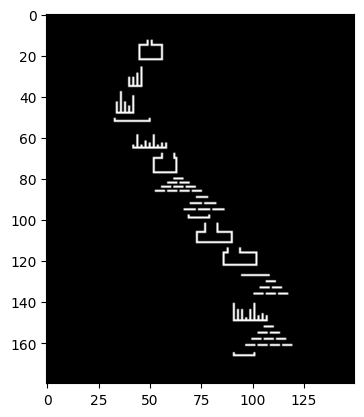

In [62]:
cave_image = np.copy(cave)
cave_image[cave_image == '.'] = 0
cave_image[cave_image == '#'] = 1
cave_image = cave_image.astype('int32')
plt.imshow(cave_image[: 180, 450:600], cmap='gray')

In [63]:
def move_sand(cave, pos):
    # directly below
    if cave[pos[0]+1, pos[1]] == '.':
        cave[pos[0], pos[1]] = '.'
        cave[pos[0]+1, pos[1]] = 'o'
        return cave, [pos[0]+1, pos[1]]
    # to the left
    elif cave[pos[0]+1, pos[1]-1] == '.':
        cave[pos[0], pos[1]] = '.'
        cave[pos[0]+1, pos[1]-1] = 'o'
        return cave, [pos[0]+1, pos[1]-1]
    # to the right
    elif cave[pos[0]+1, pos[1]+1] == '.':
        cave[pos[0], pos[1]] = '.'
        cave[pos[0]+1, pos[1]+1] = 'o'
        return cave, [pos[0]+1, pos[1]+1]
    # No where to go, start again
    cave[0, 500] = 'o' # need for p2
    return cave, [0, 500]

In [64]:
lowest = np.argwhere(cave=='#')[:,0].max()
position = (0, 500)

In [65]:
while True:
    cave, position = move_sand(cave, position)
    if position[0] >= lowest:
        break

In [66]:
# subtract one for the extra piece of sand in the void
np.count_nonzero(cave=='o') - 1

825

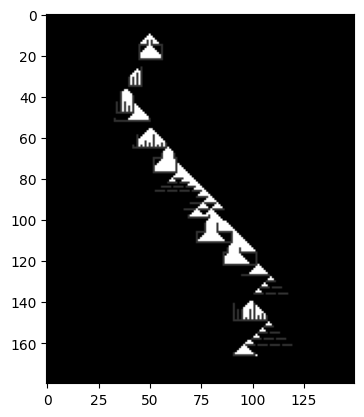

In [67]:
cave_filled = np.copy(cave)
cave_filled[cave_filled == '.'] = 0
cave_filled[cave_filled == '#'] = 150
cave_filled[cave_filled == 'o'] = 5
cave_filled = cave_filled.astype('int32')
plt.imshow(cave_filled[: 180, 450:600], cmap='gray')

## Day 14 - Part 2

In [68]:
import numpy as np
import matplotlib.pyplot as plt

with open('../challenges/14/input.txt', 'r') as f:
    data = [[coords.split(',') for coords in l.strip().split(' -> ')] for l in f.readlines()]
    # lines = [l.strip().split(' -> ') for l in f.readlines()]
    
cave = np.full((1000, 1000), '.')

for row in data:
    for i in range(len(row) - 1):
        x1, x2 = int(row[i][1]), int(row[i+1][1])
        x1, x2 = (x2, x1) if x1 >= x2 else (x1, x2)
        y1, y2 = int(row[i][0]), int(row[i+1][0])
        y1, y2 = (y2, y1) if y1 >= y2 else (y1, y2)
        # print(x1, x2, y1, y2)
        cave[x1:x2+1, y1:y2+1] = '#'
        
lowest = np.argwhere(cave=='#')[:,0].max()
position = (0, 500)
cave[lowest+2, :] = '#'

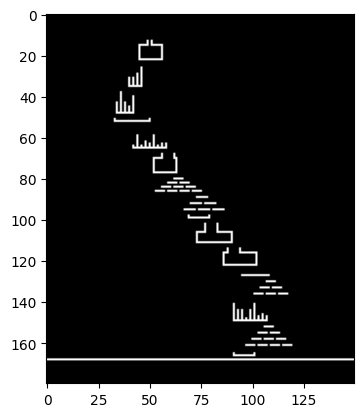

In [69]:
cave_image = np.copy(cave)
cave_image[cave_image == '.'] = 0
cave_image[cave_image == '#'] = 1
cave_image = cave_image.astype('int32')
plt.imshow(cave_image[: 180, 450:600], cmap='gray')

In [70]:
while True:
    cave, position = move_sand(cave, position)
    if cave [0, 500] == 'o' and cave[1, 500] == 'o' and cave[1, 499] == 'o' and cave[1, 501] == 'o':
        break
np.count_nonzero(cave=='o')

26729

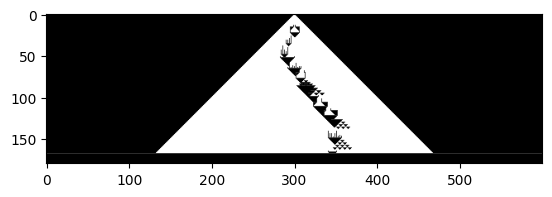

In [71]:
cave_filled = np.copy(cave)
cave_filled[cave_filled == '.'] = 0
cave_filled[cave_filled == '#'] = 150
cave_filled[cave_filled == 'o'] = 5
cave_filled = cave_filled.astype('int32')
plt.imshow(cave_filled[:180, 200:800], cmap='gray')

# Day 15

## Day 15 - Part 1

In [72]:
import numpy as np
import re

from shapely import LineString, union_all, Polygon, difference
from functools import reduce

In [73]:
with open('../challenges/15/input.txt', 'r') as f:
    data = [[int(c) for c in re.findall(r"(-?\d+)", l.strip())] for l in f.readlines()]
    # data = [[coord for coord in l.strip().split() if not coord.isalpha()] for l in f.readlines()]

sensors = []
for row in data:
    r = abs(row[0] - row[2]) + abs(row[1] - row[3])
    sensors.append((row[0], row[1], r))

In [74]:
limit = 2_000_000
# Just gonna draw a bunch of horizontal lines at y = 2_000_000 and union
lines = []

for sensor in sensors:
    diff = abs(sensor[1] - limit) # abs because sensor can be on either side of limit
    if diff <= sensor[2]:
        delta = sensor[2] - diff
        lines.append(LineString(((sensor[0] - delta, 0), (sensor[0] + delta, 0))))
int(union_all(lines).length)

5100463

## Day 15 - Part 2

In [75]:
# not my solution, but makes sense.

limit = 4_000_000
area = Polygon(((0, 0), (0, limit), (limit, limit), (limit, 0)))
zones = (
    Polygon((
        (sensor[0] + sensor[2], sensor[1]),
        (sensor[0], sensor[1] + sensor[2]),
        (sensor[0] - sensor[2], sensor[1]),
        (sensor[0], sensor[1] - sensor[2]),
    )) for sensor in sensors
)
beacon = reduce(difference, zones, area).centroid
int(beacon.x) * limit + int(beacon.y)

11557863040754